# 힙의 응용: 허프만 코드
이진트리는 각 글자의 빈도가 알려져 있는 메시지의 내용을 압축하는데 사용될 수 있음  
이진 종류의 이진트리 -> 허프만 코드 트리


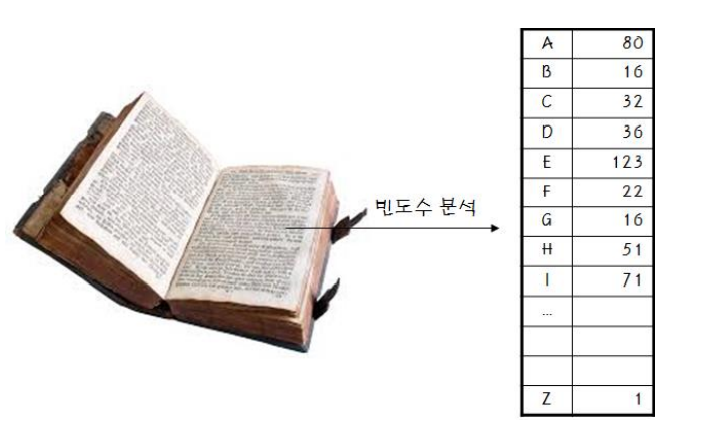

## 아스키코드는 동일한 비트 수 -> 압축 비효율적
## 자주 사용되는 문자에는 적은 비트 수 부여, 그렇지 않은 문자에는 많은 비트 수 부여 => 문서크기 줄임
모든 문자 7비트: 7bit*(E 123회+ Z 1회) -> 868비트  
E는 2비트, Z는 20비트: 2bit * (E 123회) + 20bit * (Z 1회) -> 266비트

# 압축할 때 고정길이보다 가변 길이 코드 흔히 사용

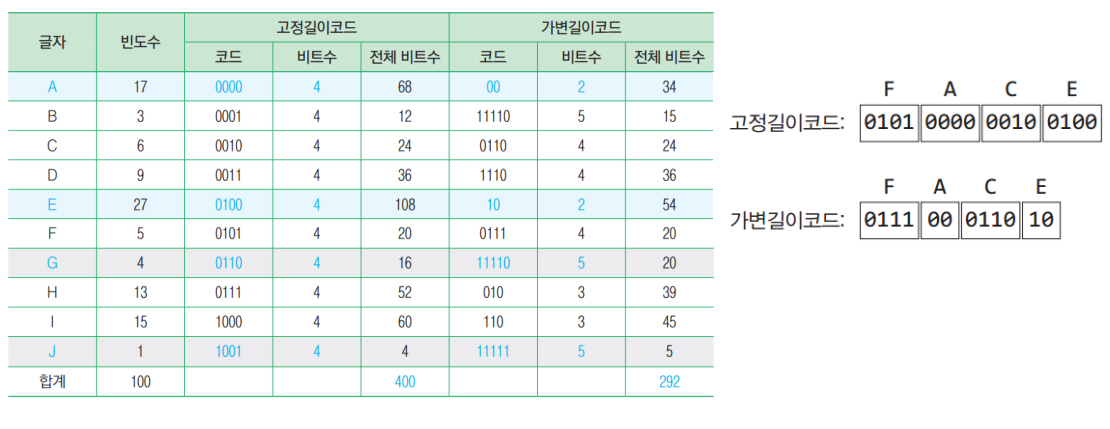

# 허프만 코드 생성 방법(최소 힙 사용)
## 1단계: 각 문자별 노드 생성, 노드 값=빈도수, 각 노드는 독립적인 트리의 루트 
## 2단계: 가장 작은 빈도수 두 노드 찾아 이진트리 구성, 루트  값 = 자식 노드 값의 합

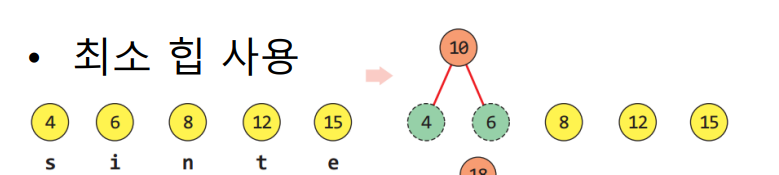

## 3단계: 남은 트리에서 가장 작은 빈도 수의 루트 2개 찾아 이진트리 구성
## 4단계: 18, 12, 15 남은 트리에 동일한 처리 12, 15 선택 이진트리 구성

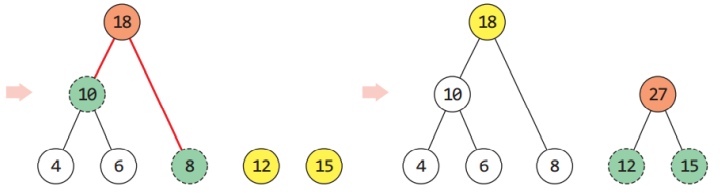

## 5단계: 18과 27 묶어 트리 구성
## 6단계: 코드 할당, 왼쪽 간선은 1 오른쪽 간선은 0

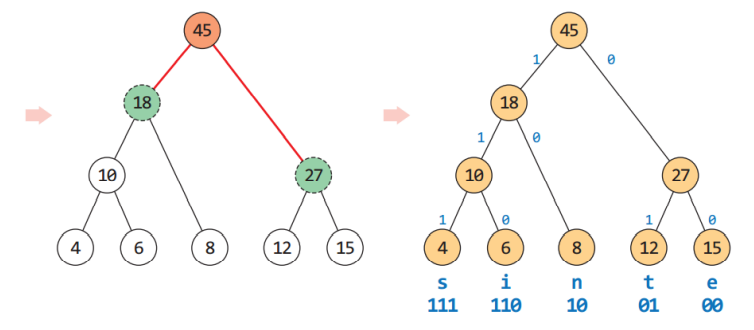

In [3]:
class MinHeap :
    def __init__ (self) :
        self.heap = []
        self.heap.append(0)
    def size(self) : return len(self.heap) - 1
    def isEmpty(self) : return self.size() == 0
    def Parent(self, i) : return self.heap[i//2]
    def Left(self, i) : return self.heap[i*2]
    def Right(self, i) : return self.heap[i*2+1]
    def display(self, msg = '힙 트리: ') :
        print(msg, self.heap[1:])
    def insert(self, n) :
        self.heap.append(n)
        i = self.size()
        while (i != 1 and n < self.Parent(i)): 
            self.heap[i] = self.Parent(i)  
            i = i // 2 
        self.heap[i] = n
       
    def delete(self) :
        parent = 1
        child = 2
        if not self.isEmpty() :
            hroot = self.heap[1]   
            last = self.heap[self.size()]
            while (child <= self.size()):
                if child<self.size() and self.Left(parent)>self.Right(parent): #만약 왼쪽 노드가 더 크면 child 1 증가
                    child += 1
                if last < self.heap[child] :       # 더 작은 자식이 있으면
                    break;                  
                self.heap[parent] = self.heap[child]
                parent = child
                child *= 2;
            self.heap[parent] = last
            self.heap.pop(-1)   
            return hroot   

In [4]:
def make_tree(freq):
    heap = MinHeap()
    for n in freq :
        heap.insert(n)
    for i in range(0, n) :
        e1 = heap.delete()
        e2 = heap.delete()
        heap.insert(e1 + e2)
        print(" (%d+%d)" % (e1, e2))
label = [ 'E', 'T', 'N', 'I', 'S' ]
freq  = [15, 12, 8, 6, 4 ]
make_tree(freq)

 (4+6)
 (8+10)
 (12+15)
 (18+27)


## 순차탐색: 가장 간단, 비효율, 정렬된 데이터
## 이진탐색: 레코드를 한번 정렬하고 탐색이 빈번하게 필요한 응용에는 효율적, 레코드의 삽입과 삭제 빈번 비효율
## 해싱: 가장 빠른 방법이지만 메모리 많이 사용, 충돌과 오버플로 문제

# 탐색트리란?
탐색을 위한 트리 기반의 자료구조  
# 이진탐색트리
효율적인 탐색을 위한 이진트리 기반의 자료구조  
삽입, 삭제, 탐색: O(logn)

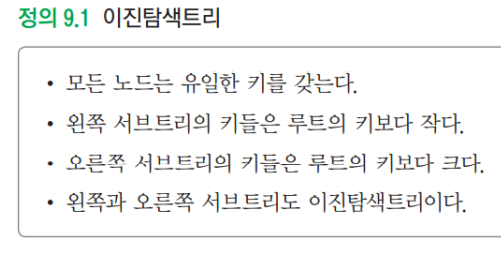

왼쪽 서브트리(3,7,12) 값들은 루트 18보다 작다. 오른쪽 서브트리(26,31,27)은 루트보다 크다

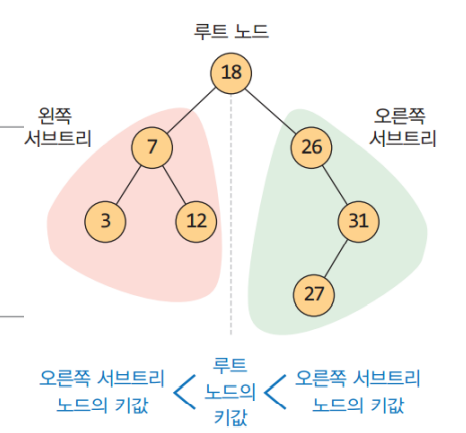

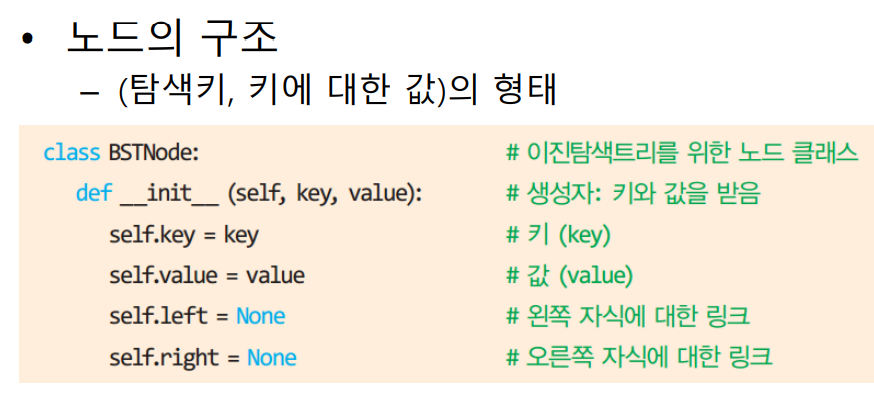

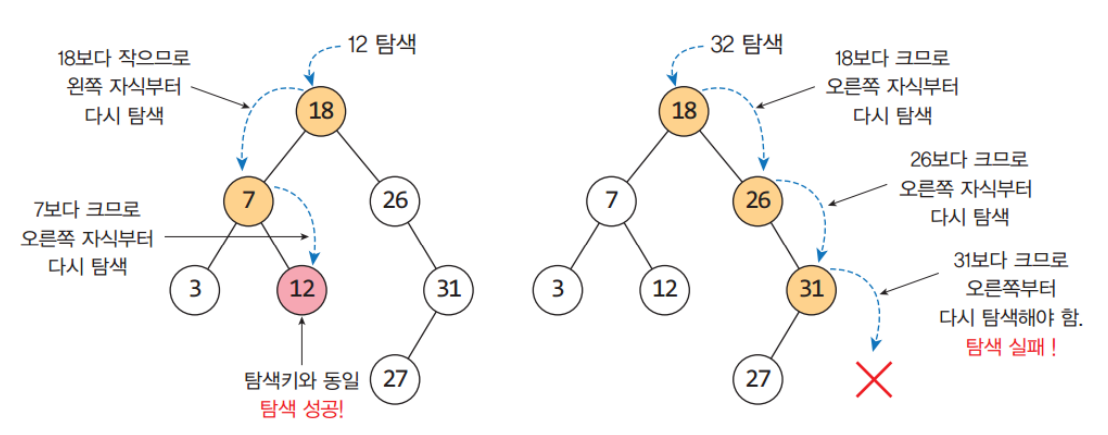

## 값을 이용한 탐색
### 키값을 기준으로 정렬
### 키가 아닌 다른 필드를 이용한 탐색도 간ㅇ
### 전위, 중위, 후위, 레벨 순회 등 가능하지만 탐색 효율 떨어짐 (모든 노드를 검사해야하기 때문)

# 삽입연산
탐색 실패 -> 실패 위치에 새로운 노드 삽입  
탐색 성공 -> 중복된 키는 삽입 X

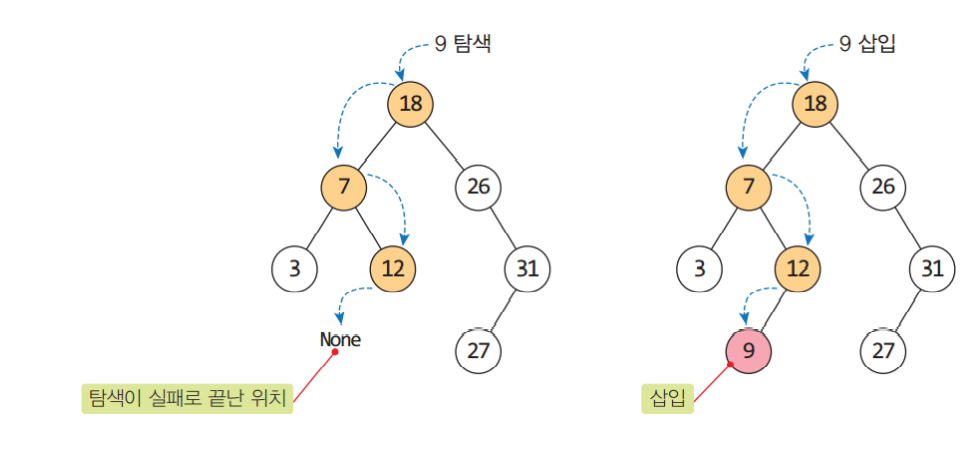

# 삭제 연산
노드 삭제의 3가지 경우  
    1. 삭제하려는 노드가 단말 노드일 경우

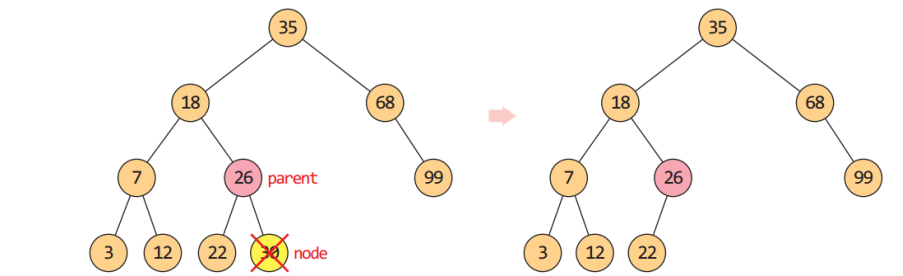

2. 삭제하려는 노드가 하나의 왼쪽이나 오른쪽 서브 트리 중 하나만 가지고 있는 경우

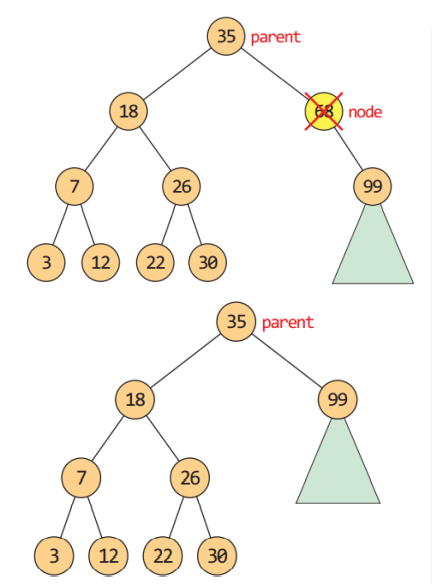

## 3. 삭제하려는 노드가 두개의 서브 트리 모두 가지고 있는 경우
이진탐색트리의 크기 조건을 계속 유지하기 위해 삭제할 노드와 키 값이 비슷한 노드가 적합  
왼쪽 가장 큰 값 12, 오른쪽 가장 작은값 22(둘 다 선택 좋음) 여기서는 오른쪽 서브트리의 제일 작은값을 후계자로

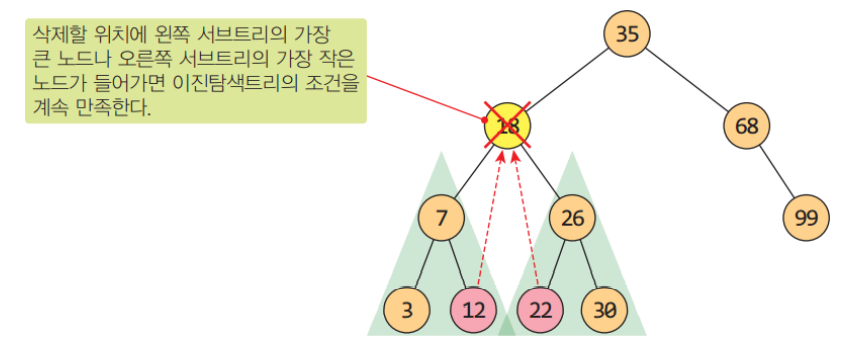

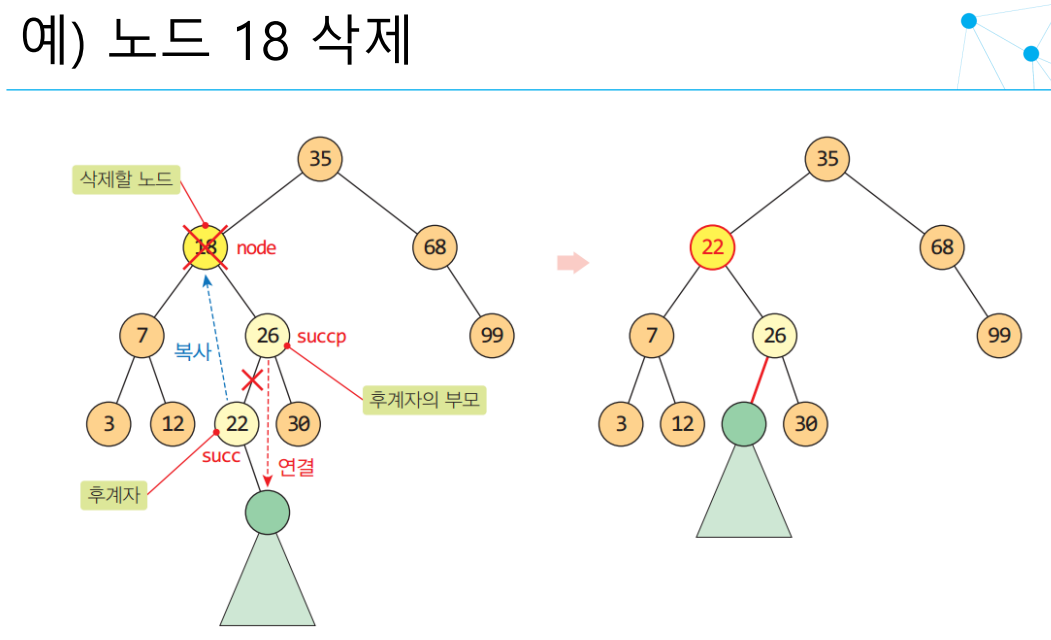

# 이진탐색트리의 성능
탐색, 삽입, 삭제 연산의 시간 트리의 높이에 비례함
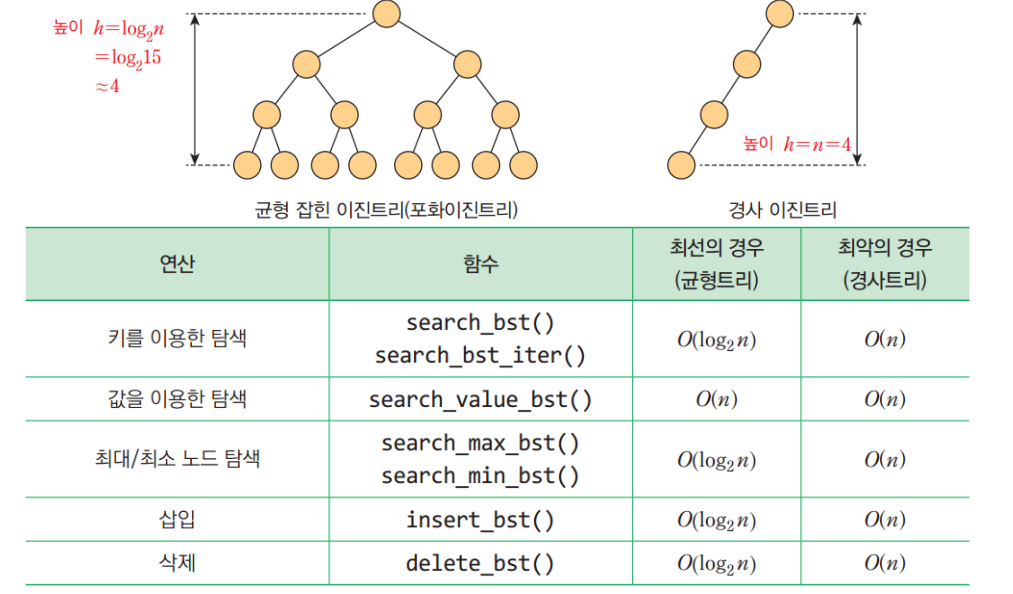

In [8]:
class BSTNode:          
    def __init__ (self, key, value):
        self.key = key
        self.value = value
        self.left = None
        
        self.right = None

In [9]:
def search_bst(n, key) :  #이진탐색 트리(순환함수)
    if n == None :
        return None
    elif key == n.key:
        return n
    elif key < n.key:      
        return search_bst(n.left, key)
    else:               
        return search_bst(n.right, key)
def search_bst_iter(n, key) :   #이진탐색 트리(반복함수)
    while n != None :       
        if key == n.key:      
            return n
        elif key < n.key:       
            n = n.left      
        else:        
            n = n.right       
    return None       
def search_value_bst(n, value) :  # 값을 이용한 탐색
    if n == None : return None
    elif value == n.value:
        return n
    res = search_value_bst(n.left, value) 
    if res is not None :
        return res
    else :
        return search_value_bst(n.right, value)
def search_max_bst(n) :
    while n != None and n.right != None:
        n = n.right
    return n
def search_min_bst(n) :
    while n != None and n.left != None:
        n = n.left
    return n
def insert_bst(r, n) :  #이진탐색 트리 삽입연산(노드 삽입): 순환구조 이용
    if n.key < r.key:
        if r.left is None :
            r.left = n
            return True
        else :
            return insert_bst(r.left, n)
    elif n.key > r.key :
        if r.right is None :
            r.right = n
            return True
        else :
            return insert_bst(r.right, n)
    else :        
        return False
def delete_bst_case1 (parent, node, root) :
    if parent is None:    
        root = None     
    else :
        if parent.left == node : 
            parent.left = None
        else :     
            parent.right = None
    return root          
def delete_bst_case2 (parent, node, root) :
    if node.left is not None :
        child = node.left
    else :
        child = node.right
    if node == root :
        root = child
    else :
        if node is parent.left : 
            parent.left = child
        else :
            parent.right = child
    return root
def delete_bst_case3 (parent, node, root) :
    succp = node
    succ = node.right
    while (succ.left != None) :
        succp = succ
        succ = succ.left
    if (succp.left == succ) :
        succp.left = succ.right
    else :
        succp.right = succ.right
    node.key = succ.key
    node.value= succ.value
    node = succ;      
    return root
def delete_bst (root, key) :
    if root == None : return None   
    parent = None   
    node = root        
    while node != None and node.key != key :
        parent = node
        if key < node.key : node = node.left
        else : node = node.right;
    if node == None : return None   
    if node.left == None and node.right == None:
        root = delete_bst_case1 (parent, node, root)
    elif node.left==None or node.right==None :
        root = delete_bst_case2 (parent, node, root)
    else :
        root = delete_bst_case3 (parent, node, root)

In [7]:
def inorder(n) :
    if n is not None :
        inorder(n.left)
        print(n.key, end=' ')
        inorder(n.right)
class BSTMap():     
    def __init__ (self):
        self.root = None
    def isEmpty (self): return self.root == None
    def clear(self): self.root = None       
    def size(self): return count_node(self.root)
    def search(self, key): return search_bst(self.root, key)
    def searchValue(self, key): return search_value_bst(self.root, key)
    def findMax(self): return search_max_bst(self.root)
    def findMin(self): return search_min_bst(self.root)
    def insert(self, key, value=None):
        n = BSTNode(key, value)  
        if self.isEmpty() :       
            self.root = n   
        else :          
            insert_bst(self.root, n) 
    def delete(self, key):   
        delete_bst (self.root, key)
    def display(self, msg = 'BSTMap :'):
        print(msg, end='')
        inorder(self.root)
        print()
map = BSTMap()
data = [35, 18,  7, 26, 12,  3, 68, 22, 30, 99]
print("[삽입 연산] : ", data)
for key in data :
    map.insert(key)                              
map.display("[중위 순회] : ")                      
if map.search(26) != None : print('[탐색  26 ] : 성공')
else : print('[탐색  26 ] : 실패')
if map.search(25) != None : print('[탐색  25 ] : 성공')
else : print('[탐색  25 ] : 실패')
map.delete(3);  map.display("[   3 삭제] : ")
map.delete(68); map.display("[  68 삭제] : ")
map.delete(18); map.display("[  18 삭제] : ")
map.delete(35); map.display("[  35 삭제] : ")

[삽입 연산] :  [35, 18, 7, 26, 12, 3, 68, 22, 30, 99]
[중위 순회] : 3 7 12 18 22 26 30 35 68 99 
[탐색  26 ] : 성공
[탐색  25 ] : 실패
[   3 삭제] : 7 12 18 22 26 30 35 68 99 
[  68 삭제] : 7 12 18 22 26 30 35 99 
[  18 삭제] : 7 12 22 26 30 35 99 
[  35 삭제] : 7 12 22 26 30 99 


## 이진 트리의 문제점: 한쪽으로 치우친 형태로 트리 구조가 만들어질 수 있다
## 이렇게 되면 트리 구조가 아니라 일반적인 연결리스트와 별 차이가 없는 구조가 되어 이진트리의 장점 X

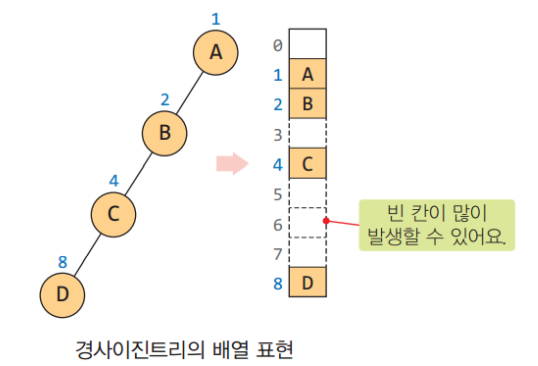